# **Health Insurance Cost Analysis**

### Data Analysis & Visualization

### Objective:

To analyze how demographic factors (age, gender, region), lifestyle choices (smoking), and physical attributes (BMI, children count) influence medical insurance charges. The goal is to identify key cost-driving variables using exploratory data analysis, visualization, and statistical hypothesis testing.

Dataset Source:
 Kaggle – Medical Cost Personal Dataset

Project head - Krishna Chaudhari

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/GNCIPL-AIML/Week-2/insurance.csv'
df = pd.read_csv(file_path)
df_copy = df.copy()

# Display first 5 rows
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_copy.info()
df_copy.describe()
df_copy.isnull().sum()
df_copy.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


np.int64(1)

Insight

Confirms dataset structure, missing values, and duplicates.

## Plots

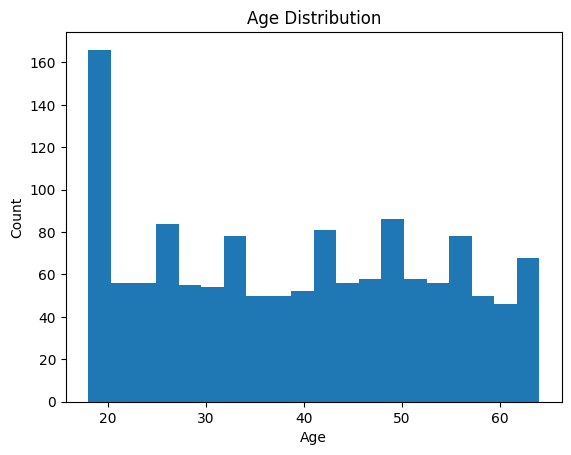

In [6]:
plt.hist(df_copy['age'], bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

Insight

Age is mostly between 20–30.

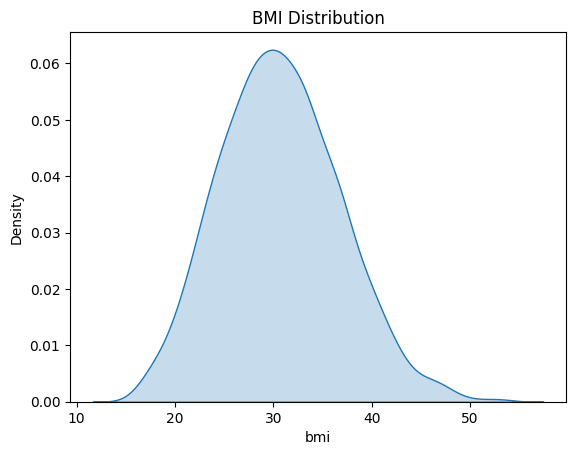

In [7]:
sns.kdeplot(df_copy['bmi'], fill=True)
plt.title("BMI Distribution")
plt.show()

Insight

BMI's many values are around 30.

In [10]:
import plotly.express as px

fig = px.box(df_copy, y="charges", title="Medical Charges Boxplot (Plotly)")
fig.show()

Insight

Medical charges are highly uneven—most people pay between 5k–17k, but many patients have very high charges, shown by the large number of outliers above the box. This indicates strong cost variation across individuals.

In [12]:
fig = px.scatter(df_copy, x="bmi", y="charges",
                 color="smoker",
                 hover_data=["age", "region"],
                 title="BMI vs Charges (Colored by Smoker)")
fig.show()

Insight

Smokers pay much higher charges than non-smokers.

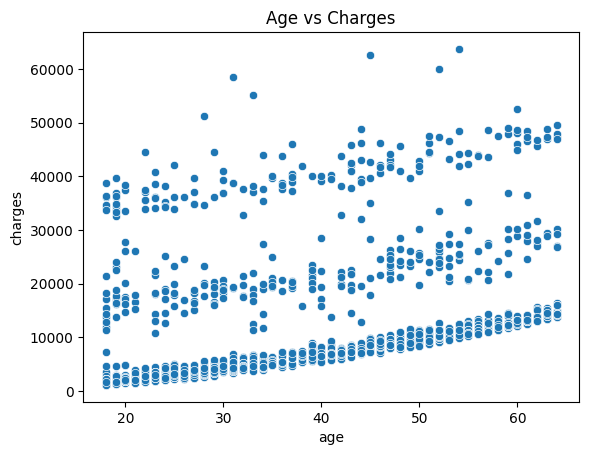

In [13]:
sns.scatterplot(x=df_copy['age'], y=df_copy['charges'])
plt.title("Age vs Charges")
plt.show()

Insight

Higher age shows higher medical charges.

In [14]:
fig = px.bar(df_copy.groupby("region")["charges"].mean().reset_index(),
             x="region", y="charges",
             title="Average Medical Charges by Region (Plotly)",
             text_auto=".2f")
fig.show()

Insight

Average charges differ slightly across regions but not dramatically.

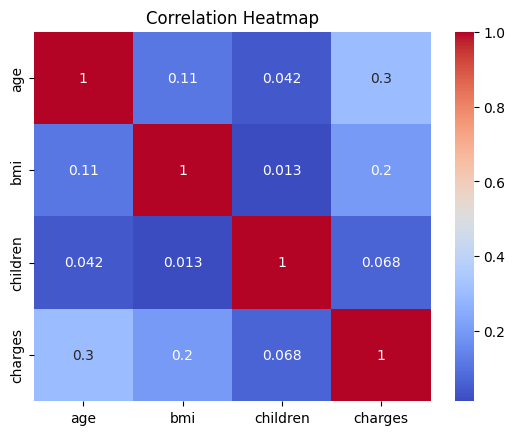

In [17]:
numeric_df = df_copy.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Insight:

Charges show a moderate positive correlation with age (0.30) and BMI (0.20), while children count has very weak correlation. This means age and BMI influence medical costs more than other factors.

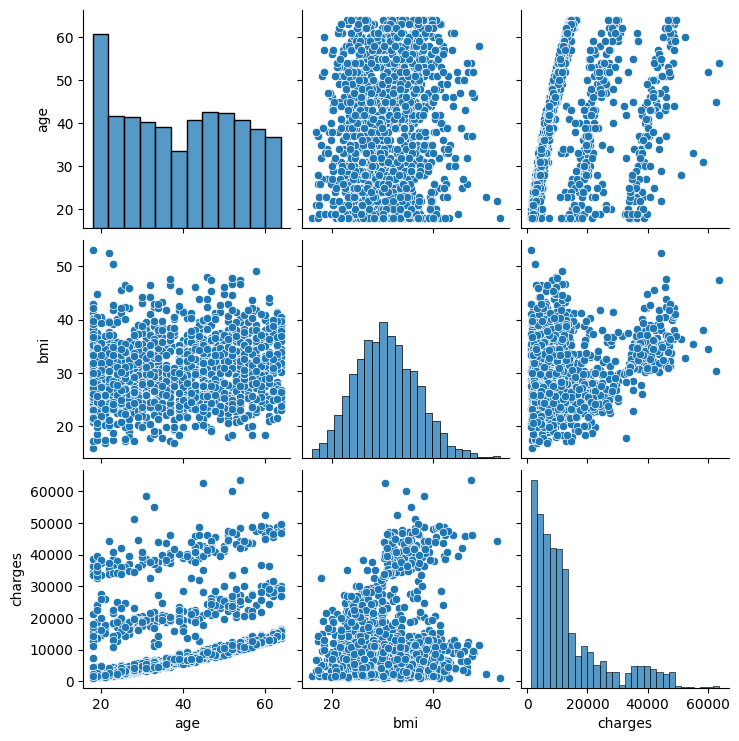

In [18]:
sns.pairplot(df_copy[['age', 'bmi', 'charges']])
plt.show()

Insight:

The pairplot shows that charges increase with both age and BMI, while the charges distribution is highly right-skewed. Age and BMI are fairly spread out, confirming strong individual variation in patient profiles.

## **HYPOTHESIS TESTING**

In [19]:
# TEST 1 — Pearson Correlation (BMI vs Charges)
stats.pearsonr(df_copy['bmi'], df_copy['charges'])

PearsonRResult(statistic=np.float64(0.1983409688336288), pvalue=np.float64(2.4590855351167345e-13))

Correlation coefficient (r): 0.19 → Weak relationship

p-value: < 0.001 → Statistically significant

Conclusion: BMI influences charges, but not strongly.

In [20]:
# TEST 2 — T-Test (Smoker vs Non-Smoker Charges)
smokers = df_copy[df_copy['smoker']=="yes"]['charges']
nonsmokers = df_copy[df_copy['smoker']=="no"]['charges']
stats.ttest_ind(smokers, nonsmokers)

TtestResult(statistic=np.float64(46.66492117272371), pvalue=np.float64(8.271435842179102e-283), df=np.float64(1336.0))

Insight:

Smokers and non-smokers have drastically different medical charges (t = 46.66, p < 0.001). This shows smoking has a very strong impact on increasing medical expenses.

In [21]:
# TEST 3 — ANOVA (Region-wise Charges)
r1 = df_copy[df_copy['region']=="southwest"]['charges']
r2 = df_copy[df_copy['region']=="southeast"]['charges']
r3 = df_copy[df_copy['region']=="northwest"]['charges']
r4 = df_copy[df_copy['region']=="northeast"]['charges']

stats.f_oneway(r1, r2, r3, r4)

F_onewayResult(statistic=np.float64(2.96962669358912), pvalue=np.float64(0.0308933560705201))

Insight:

ANOVA shows a statistically significant difference in charges across regions (F = 2.97, p = 0.03). This means at least one region’s average medical cost is different from the others.

In [22]:
# TEST 4 — Tukey HSD (Post-ANOVA)
tukey = pairwise_tukeyhsd(endog=df_copy['charges'], groups=df_copy['region'], alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7245 -3428.9343 1451.3161  False
northeast southeast  1329.0269 0.4745 -1044.9417 3702.9955  False
northeast southwest -1059.4471 0.6792 -3499.5723 1380.6781  False
northwest southeast  2317.8361 0.0583   -54.1994 4689.8716  False
northwest southwest    -70.638 0.9999 -2508.8826 2367.6066  False
southeast southwest -2388.4741 0.0477 -4760.5096  -16.4386   True
-----------------------------------------------------------------


Insight:

Tukey HSD reveals that only the southeast region has significantly higher medical charges than the southwest region (p = 0.047). All other region pairs show no meaningful difference.